#Evaluation of Classifier Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import gdown
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import LeaveOneOut

In [2]:
url="https://github.com/gedeck/dmba/raw/master/datasets/dmba-datasets.zip"
gdown.download(url,'file.zip',quiet=True)
!unzip file.zip &> /dev/null

In [3]:
df=pd.read_csv('/content/dmba/eBayAuctions.csv')
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


<Axes: xlabel='Competitive?', ylabel='count'>

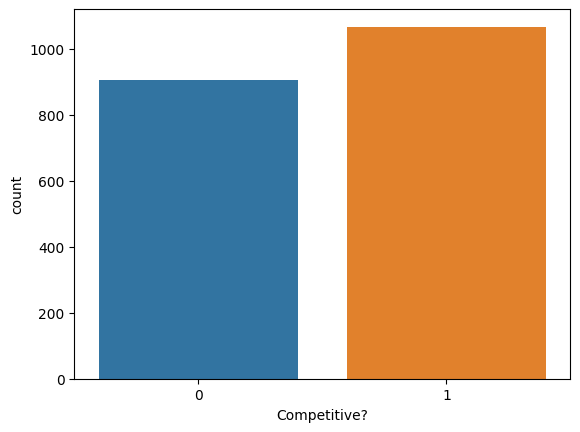

In [4]:
import seaborn as sns
sns.countplot(data=df, x='Competitive?')

In [5]:
df=pd.get_dummies(data=df,columns=df.columns[0:-1],drop_first=True).assign(**{f"Competitive?": df['Competitive?'].to_list()})
df.head()

,Competitive?,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,Category_Electronics,Category_EverythingElse,...,OpenPrice_199.0,OpenPrice_199.99,OpenPrice_200.0,OpenPrice_219.0,OpenPrice_290.0,OpenPrice_300.0,OpenPrice_359.95,OpenPrice_549.0,OpenPrice_650.0,OpenPrice_999.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Holdout Method Without Shuffling
X=df.drop('Competitive?',axis=1)
y=df['Competitive?']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.368,shuffle=False)
clf=LogisticRegression(random_state=42)
clf.fit(Xtrain, ytrain)
accuracy_score(ytest,clf.predict(Xtest))

0.6101928374655647

In [7]:
#Holdout Method With Shuffling
X=df.drop('Competitive?',axis=1)
y=df['Competitive?']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.368,shuffle=True, random_state=42)
clf=LogisticRegression(random_state=42)
clf.fit(Xtrain, ytrain)
accuracy_score(ytest,clf.predict(Xtest))

0.859504132231405

In [8]:
#Holdout Method With Shuffling and Random Subsampling
num_samples = 10
X=df.drop('Competitive?',axis=1)
y=df['Competitive?']
accuracies = []
for _ in range(num_samples):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.368,shuffle = True)
  clf=LogisticRegression(random_state=42)
  clf.fit(Xtrain, ytrain)
  accuracies.append(accuracy_score(ytest,clf.predict(Xtest)))
display(accuracies)
np.mean(accuracies)

[0.8484848484848485,
 0.8292011019283747,
 0.8415977961432507,
 0.8264462809917356,
 0.8250688705234159,
 0.8360881542699724,
 0.8443526170798898,
 0.8443526170798898,
 0.8236914600550964,
 0.8663911845730028]

0.8385674931129478

In [9]:
#Leave-One-Out
loo = LeaveOneOut()
X = df.drop('Competitive?', axis=1)
y = df['Competitive?']
accuracies = []

for train_index, test_index in loo.split(X):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

    clf = LogisticRegression(random_state=42)
    clf.fit(Xtrain, ytrain)
    accuracies.append(accuracy_score(ytest, clf.predict(Xtest)))

np.mean(accuracies)


0.8630831643002028

In [10]:
#Bootstrap
# Set the random seed for reproducibility
np.random.seed(42)
data = df

# Number of bootstrap samples
num_samples = 10

# Initialize empty lists to store bootstrap samples and testing sets
bootstrap_training_sets = []
bootstrap_testing_sets = []

for _ in range(num_samples):
    # Perform bootstrap resampling
    bootstrap_sample_indices = np.random.choice(len(data), size=len(data), replace=True)
    bootstrap_sample = data.iloc[bootstrap_sample_indices, :]
    bootstrap_training_sets.append(bootstrap_sample)

    # Identify the indices of the testing set (unsampled data points)
    testing_set_indices = np.setdiff1d(np.arange(len(data)), bootstrap_sample_indices)
    testing_set = data.iloc[testing_set_indices, :]
    bootstrap_testing_sets.append(testing_set)

In [11]:
#Bootstrap fraction not chosen
(len(bootstrap_sample_indices)-len(np.unique(bootstrap_sample_indices)))/len(bootstrap_sample_indices)

0.3671399594320487

In [12]:
#Bootstrap fraction chosen
len(np.unique(bootstrap_sample_indices))/len(bootstrap_sample_indices)

0.6328600405679513

In [13]:
#Bootstrap
accuracies = []
for training_set,testing_set in zip(bootstrap_training_sets,bootstrap_testing_sets):
  Xtrain=training_set.drop('Competitive?',axis=1)
  ytrain=training_set['Competitive?']
  Xtest=testing_set.drop('Competitive?',axis=1)
  ytest=testing_set['Competitive?']
  clf=LogisticRegression(random_state=42)
  clf.fit(Xtrain, ytrain)
  acctest= accuracy_score(ytest,clf.predict(Xtest))
  acctrain= accuracy_score(ytrain,clf.predict(Xtrain))
  ftest=len(ytest)/(len(ytest)+len(ytrain))
  ftrain=len(ytrain)/(len(ytest)+len(ytrain))
  accuracies.append(acctest*ftest + acctrain*ftrain)
display(accuracies)
np.mean(accuracies)

[0.9236977256052825,
 0.9244249726177437,
 0.9352091817845244,
 0.9327669006280014,
 0.9276485788113695,
 0.9314966492926284,
 0.9353400222965441,
 0.9332841872465906,
 0.9357593761604158,
 0.9321216617210683]

0.9311749256164168

In [14]:
#Cross-Validation without Shuffling
clf=LogisticRegression(random_state=42)
cv_results = cross_validate(clf, X, y, cv=10)
cv_results['test_score']

array([0.67676768, 0.58585859, 0.58375635, 0.61928934, 0.64974619,
       0.61928934, 0.60913706, 0.69035533, 0.59898477, 0.69035533])

In [15]:
#Cross-Validation with Shuffling
shuffled_df = df.sample(frac=1, random_state=42)
X_shuffled=shuffled_df.drop('Competitive?',axis=1)
y_shuffled=shuffled_df['Competitive?']
clf=LogisticRegression(random_state=42)
cv_results = cross_validate(clf, X_shuffled, y_shuffled, cv=10)
cv_results['test_score']

array([0.86363636, 0.86363636, 0.88324873, 0.84771574, 0.84771574,
       0.88324873, 0.83756345, 0.79187817, 0.83756345, 0.9035533 ])

In [16]:
#Stratified Cross-Validation Without Shuffling
skf = StratifiedKFold(n_splits=10,shuffle=False)
clf=LogisticRegression(random_state=42)
cv_results = cross_validate(clf, X, y, cv=skf)
cv_results['test_score']

array([0.67676768, 0.58585859, 0.58375635, 0.61928934, 0.64974619,
       0.61928934, 0.60913706, 0.69035533, 0.59898477, 0.69035533])

In [17]:
#Stratified Cross-Validation With Shuffling
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
clf=LogisticRegression(random_state=42)
cv_results = cross_validate(clf, X, y, cv=skf)
cv_results['test_score']

array([0.83838384, 0.85858586, 0.83248731, 0.82741117, 0.89340102,
       0.8680203 , 0.84263959, 0.83756345, 0.84263959, 0.85279188])

In [18]:
#Stratified Cross-Validation Without Shuffling
accuracies = []
skf = StratifiedKFold(n_splits=10,shuffle=False)
skf.get_n_splits(X, y)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  Xtrain = X.iloc[train_index]
  Xtest = X.iloc[test_index]
  ytrain = y.iloc[train_index]
  ytest = y.iloc[test_index]
  clf=LogisticRegression(random_state=42)
  clf.fit(Xtrain, ytrain)
  accuracies.append(accuracy_score(ytest,clf.predict(Xtest)))
display(accuracies)
np.mean(accuracies)

[0.6767676767676768,
 0.5858585858585859,
 0.583756345177665,
 0.6192893401015228,
 0.649746192893401,
 0.6192893401015228,
 0.6091370558375635,
 0.6903553299492385,
 0.5989847715736041,
 0.6903553299492385]

0.6323539968210019

In [19]:
#Stratified Cross-Validation With Shuffling
accuracies = []
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
skf.get_n_splits(X, y)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  Xtrain = X.iloc[train_index]
  Xtest = X.iloc[test_index]
  ytrain = y.iloc[train_index]
  ytest = y.iloc[test_index]
  clf=LogisticRegression(random_state=42)
  clf.fit(Xtrain, ytrain)
  accuracies.append(accuracy_score(ytest,clf.predict(Xtest)))
display(accuracies)
np.mean(accuracies)

[0.8383838383838383,
 0.8585858585858586,
 0.8324873096446701,
 0.8274111675126904,
 0.8934010152284264,
 0.868020304568528,
 0.8426395939086294,
 0.8375634517766497,
 0.8426395939086294,
 0.8527918781725888]

0.849392401169051

#Classification Performance Metrics

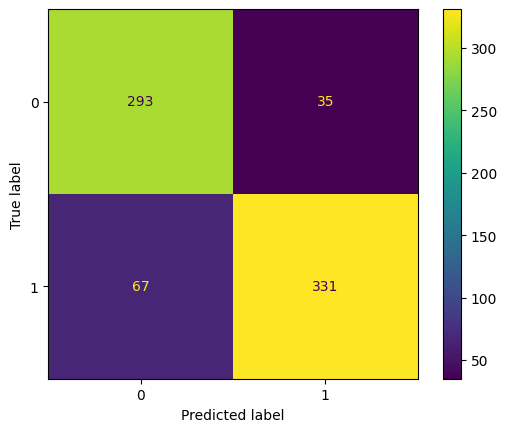

In [20]:
#Confusion Matrix with ConfusionMatrixDisplay
X=df.drop('Competitive?',axis=1)
y=df['Competitive?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.368, random_state=42,shuffle=True)
clf=LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
cm=ConfusionMatrixDisplay.from_predictions(y_test,clf.predict(X_test));

In [21]:
#Confusion Matrix with confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[293,  35],
       [ 67, 331]])

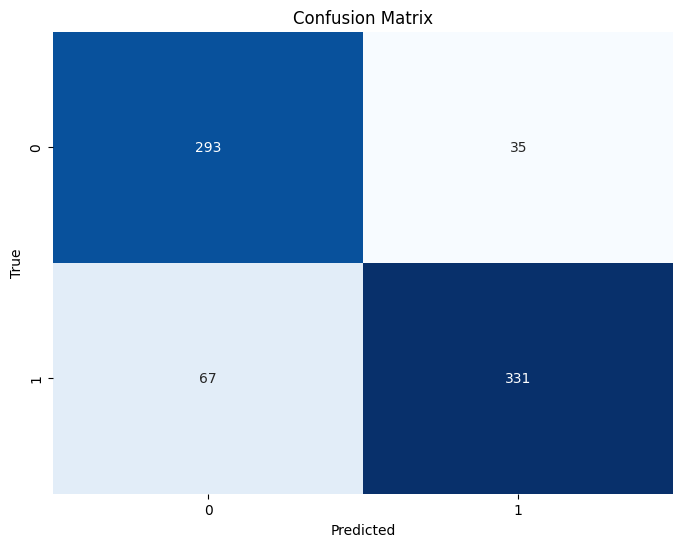

In [22]:
#Confusion Matrix with Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#Metrics using classification_report (scikit-learn)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       328
           1       0.90      0.83      0.87       398

    accuracy                           0.86       726
   macro avg       0.86      0.86      0.86       726
weighted avg       0.86      0.86      0.86       726



In [24]:
#Evaluation Metrics

# True Positives, True Negatives, False Positives, False Negatives
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Precision
precision = tp / (tp + fp)

# Recall
recall = recall_score(y_test, y_pred)

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# F1 Score (F-measure)
f1 = f1_score(y_test, y_pred)
f1 = 2*precision*recall/(precision + recall)

# F2 Score (you can adjust beta for different emphasis on precision or recall)
beta = 2
f2 = (1 + beta**2) * (precision * sensitivity) / ((beta**2 * precision) + sensitivity)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
mcc = (tp*tn-fp*fn)/(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))

# Print the results
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"F2 Score: {f2}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")


True Positives (TP): 331
True Negatives (TN): 293
False Positives (FP): 35
False Negatives (FN): 67
Sensitivity: 0.8316582914572864
Specificity: 0.8932926829268293
Precision: 0.9043715846994536
Recall: 0.8316582914572864
Accuracy: 0.859504132231405
F1 Score: 0.8664921465968587
F2 Score: 0.8452502553626149
Matthews Correlation Coefficient (MCC): 0.7215979699177827


The F1 score is a metric commonly used in binary classification to evaluate the balance between precision and recall. It is the harmonic mean of precision and recall and is defined by the following formula:

$$ F1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$

where:
- Precision is the number of true positives divided by the sum of true positives and false positives: $\text{precision} = \frac{TP}{TP + FP}$
- Recall is the number of true positives divided by the sum of true positives and false negatives: $\text{recall} = \frac{TP}{TP + FN}$

The F1 score ranges from 0 to 1, with 1 being the best possible F1 score (perfect precision and recall) and 0 being the worst. The F1 score is particularly useful in situations where there is an uneven class distribution (imbalanced dataset) because it considers both false positives and false negatives.

In some cases, there may be a trade-off between precision and recall. The F1 score provides a single value that balances both measures, making it a useful metric for binary classification tasks.

The Matthews Correlation Coefficient (MCC) is a measure of the quality of binary classifications, particularly in the context of imbalanced datasets. It takes into account true and false positives and negatives and is considered a balanced measure even if the classes are of very different sizes. MCC is calculated using the formula:

$$ MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}} $$

where:
- $ TP $ is the number of true positives,
- $ TN $ is the number of true negatives,
- $ FP $ is the number of false positives, and
- $ FN $ is the number of false negatives.

MCC ranges from -1 to 1, where 1 indicates a perfect prediction, 0 indicates no better than random prediction, and -1 indicates total disagreement between prediction and observation.

Key points about MCC:

1. **Balance**: MCC is considered balanced even if the classes are of different sizes. This is particularly useful when dealing with imbalanced datasets where one class significantly outnumbers the other.

2. **Range**: The range of MCC is from -1 to 1, with 1 representing perfect prediction, 0 indicating random prediction, and -1 indicating complete disagreement between prediction and observation.

3. **Interpretation**:
   - $1$: Perfect agreement between prediction and observation.
   - $0$: No better than random prediction.
   - $-1$: Complete disagreement between prediction and observation.

4. **Use in Machine Learning**: MCC is commonly used in the evaluation of binary classification models, especially when the classes are imbalanced. It provides a comprehensive assessment by considering all four elements of the confusion matrix.

When working with imbalanced datasets or when a balanced evaluation metric is needed, MCC can be a more informative measure compared to accuracy, especially in situations where the distribution of the classes is uneven.

#Receiver Operating Characteristic (ROC) Curve

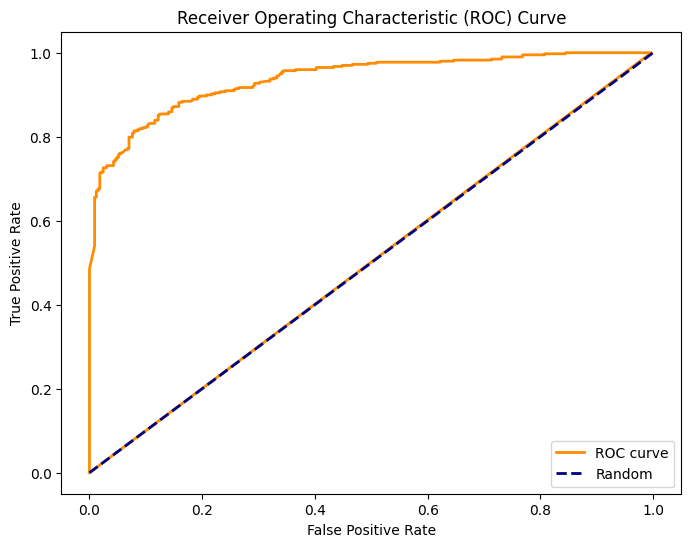

In [25]:
#ROC Curve

X=df.drop('Competitive?',axis=1)
y=df['Competitive?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.368, random_state=42,shuffle=True)
clf=LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_true = y_test
probas = clf.predict_proba(X_test)[:, 1]

# Sort the probabilities and true labels by probabilities
sorted_indices = np.argsort(probas)
sorted_probs = probas[sorted_indices]
sorted_labels = np.array(y_true)[sorted_indices]

# Initialize variables for ROC curve
fpr = [0]
tpr = [0]
thresholds = [sorted_probs[0]]

# Calculate TPR and FPR for each threshold
for i in range(1, len(sorted_probs)):
    threshold = sorted_probs[i]
    tp = np.sum((sorted_probs >= threshold) & (sorted_labels == 1))
    fp = np.sum((sorted_probs >= threshold) & (sorted_labels == 0))
    tn = np.sum((sorted_probs < threshold) & (sorted_labels == 0))
    fn = np.sum((sorted_probs < threshold) & (sorted_labels == 1))

    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))
    thresholds.append(threshold)

# Convert lists to numpy arrays
fpr = np.array(fpr)
tpr = np.array(tpr)
thresholds = np.array(thresholds)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


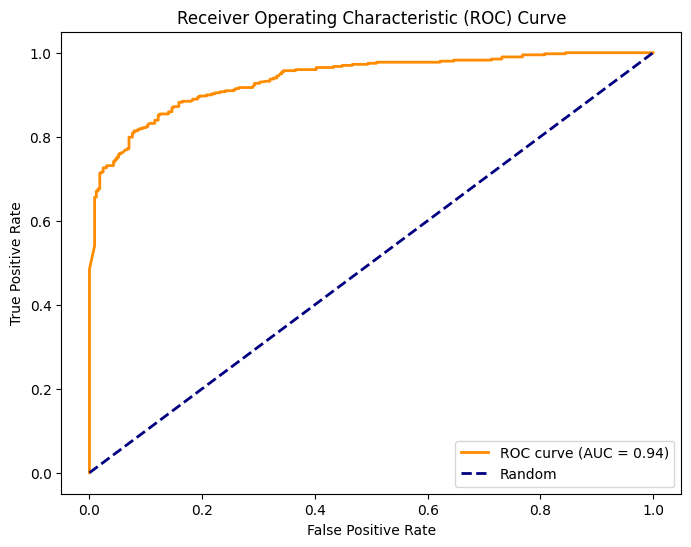

In [26]:
# ROC Curve with roc_curve (scikit-learn) and Matplotlib
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


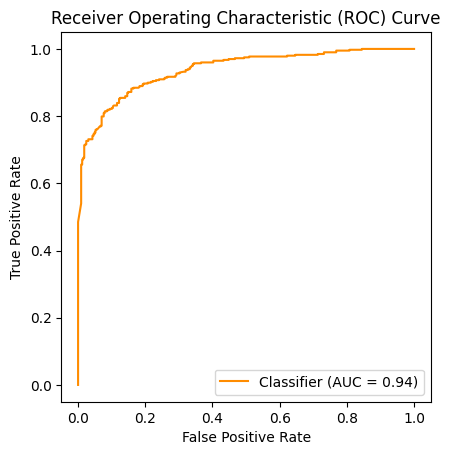

In [27]:
# ROC Curve with RocCurveDisplay (scikit-learn)

RocCurveDisplay.from_predictions(y_test,probas, color="darkorange")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

#Cumulative Gains Curve

<Figure size 700x700 with 0 Axes>

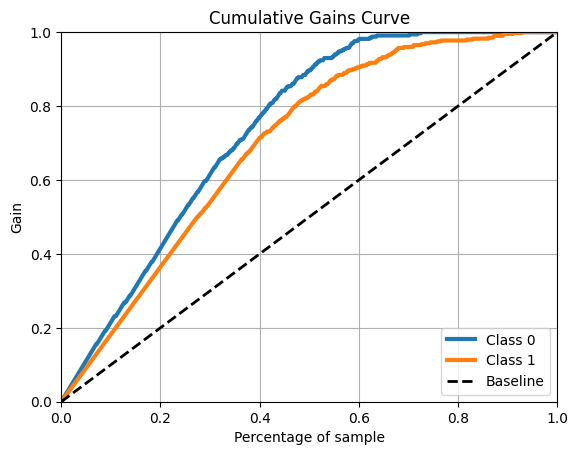

In [28]:
#Cumulative Gains Curve using scikit-plot
!pip install scikit-plot &>/dev/null
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, clf.predict_proba(X_test))
plt.show()

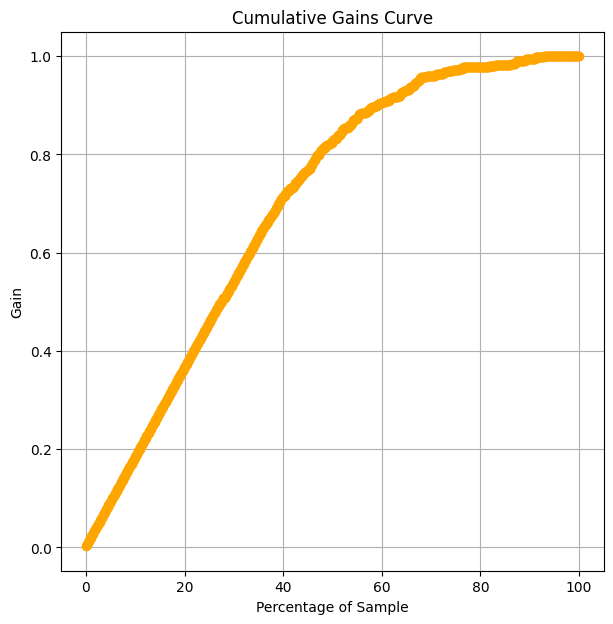

In [29]:
#Cumulative Gains Curve

# Assuming 'y_prob' contains the predicted probabilities for the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Sort the predictions by probability
sorted_indices = np.argsort(y_prob, kind='mergesort')[::-1]
ytest_sorted = y_test.iloc[sorted_indices]

# Calculate cumulative gain values
percentile = np.linspace(0, 100, len(ytest_sorted))
gain = np.cumsum(ytest_sorted) / np.sum(ytest_sorted)

# Plot the cumulative gain curve
plt.figure(figsize=(7, 7))
plt.plot(percentile, gain, marker='o', linestyle='-', color='orange')

# Add labels and title
plt.xlabel('Percentage of Sample')
plt.ylabel('Gain')
plt.title('Cumulative Gains Curve')

# Show the plot
plt.grid(True)
plt.show()


#Lift Curve

<Figure size 700x700 with 0 Axes>

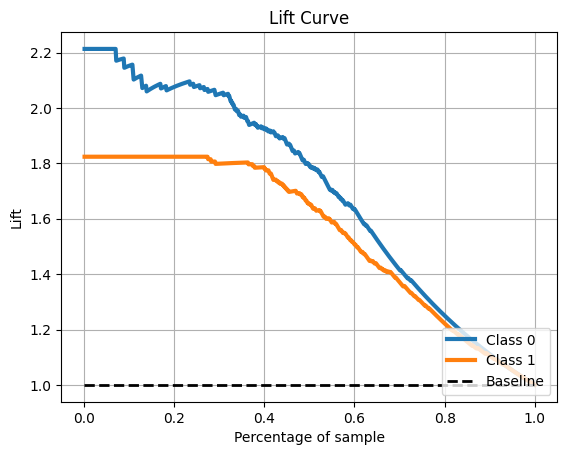

In [30]:
#Lift Curve using scikit-plot
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y_test, clf.predict_proba(X_test));
plt.show()

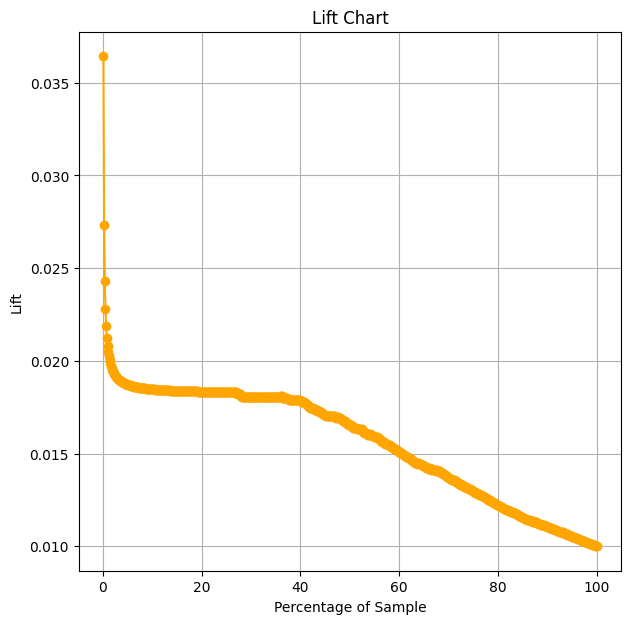

In [31]:
#Lift Curve

y_prob = clf.predict_proba(X_test)[:, 1]

# Sort the predictions by probability
sorted_indices = np.argsort(y_prob, kind='mergesort')[::-1]
ytest_sorted = y_test.iloc[sorted_indices]

# Calculate cumulative gain values
percentile = np.linspace(0, 100, len(ytest_sorted))
cumulative_gain = np.cumsum(ytest_sorted) / np.sum(ytest_sorted)

# Calculate the baseline cumulative gain (if predictions were random)
baseline = np.linspace(0, 100, len(ytest_sorted))

# Calculate the lift values
lift_values = cumulative_gain / baseline

# Plot the lift chart
plt.figure(figsize=(7, 7))
plt.plot(percentile, lift_values, marker='o', linestyle='-', color='orange')

# Add labels and title
plt.xlabel('Percentage of Sample')
plt.ylabel('Lift')
plt.title('Lift Chart')

# Show the plot
plt.grid(True)
plt.show()


#Decile Lift Chart

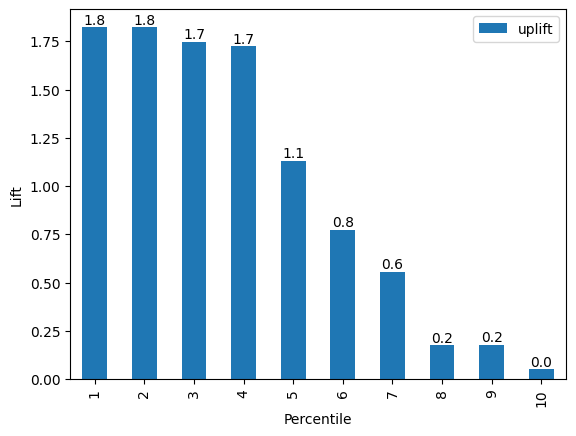

In [32]:
#Decile-wise Lift Chart
df1=pd.DataFrame(clf.predict_proba(X_test),columns=['P0','P1'])
df1['ytest']=y_test.values
df1['ytest']=y_test.values
df1=df1.sort_values(by='P1',ascending=False)
df1['Decile'] = pd.qcut(df1['P1'], 10, labels=False)
df1['Decile']=df1['Decile']+1
df1['Decile']=list(df1['Decile'].loc[::-1])
df1['Cumulative Gain']=df1['ytest'].cumsum()
df1.head()

df2=df1.groupby(by=['Decile']).mean()
df2

df2['uplift']=df2['ytest']/df1.ytest.mean()
df2

#df2.reset_index().plot(kind='bar',x='Decile',y='uplift',ylabel='Lift',xlabel='Percential')

ax = df2.reset_index().plot(kind='bar', x='Decile', y='uplift', ylabel='Lift', xlabel='Percentile')

# Annotate the bars with actual values
for index, value in enumerate(df2['uplift']):
    ax.text(index, value, round(value, 1), ha='center', va='bottom')


Colab environment detected.


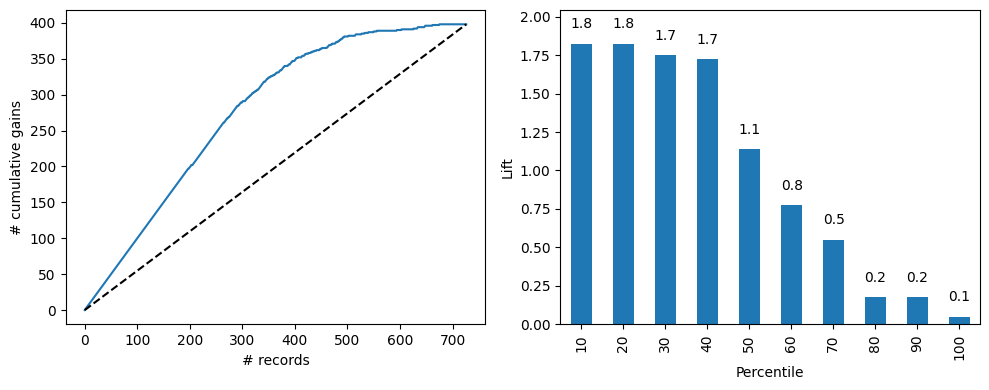

In [33]:
#Cumulative Gains and Lift using DMBA Toolbox
!pip install dmba &>/dev/null
from dmba import classificationSummary, regressionSummary, gainsChart, liftChart, AIC_score
y_prob = clf.predict_proba(X_test)[:, 1]
# Sort the predictions by probability
sorted_indices = np.argsort(y_prob, kind='mergesort')[::-1]
ytest_sorted = y_test.iloc[sorted_indices]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(ytest_sorted, ax=axes[0])
liftChart(ytest_sorted, title=False, ax=axes[1])
plt.tight_layout()
plt.show()

In [34]:
classificationSummary(y_test,clf.predict(X_test))

Confusion Matrix (Accuracy 0.8595)

       Prediction
Actual   0   1
     0 293  35
     1  67 331
